# Colliding Axisymmetric PP Waves by Ivanov
##  Geoff Cope
##  Univeristy of Utah
##  January 5th, 2022

https://arxiv.org/abs/gr-qc/9705061

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,r,phi,du,dv,dr,dphi = symbols('u v r phi du dv dr dphi')

In [49]:
Q = Function('Q')(u,v,r)
Q

In [50]:
P = Function('P')(u,v,r)
P

In [6]:
variables = Matrix( [u,v,r,phi] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢r⎥
⎢ ⎥
⎣φ⎦

In [7]:
differentials = Matrix( [du,dv,dr,dphi] ) 
differentials

⎡ du ⎤
⎢    ⎥
⎢ dv ⎥
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎣dphi⎦

In [51]:
lineElement = 2*du*dv - Q**2 * dr**2 - P**2 * dphi**2  
lineElement

In [52]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡0  1       0             0      ⎤
⎢                                ⎥
⎢1  0       0             0      ⎥
⎢                                ⎥
⎢        2                       ⎥
⎢0  0  -Q (u, v, r)       0      ⎥
⎢                                ⎥
⎢                      2         ⎥
⎣0  0       0        -P (u, v, r)⎦

In [10]:
import sympy

In [53]:
m = sympy.Array(g)
m

⎡0  1       0             0      ⎤
⎢                                ⎥
⎢1  0       0             0      ⎥
⎢                                ⎥
⎢        2                       ⎥
⎢0  0  -Q (u, v, r)       0      ⎥
⎢                                ⎥
⎢                      2         ⎥
⎣0  0       0        -P (u, v, r)⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("u v r phi")
u,v,r,phi = syms

In [54]:
metric = MetricTensor(m,syms)

In [55]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                            ⎡           
⎢                                                                                                                            ⎢           
⎢                                                                                                                            ⎢           
⎢                                                                                                                            ⎢      0    
⎢                                                                                                                            ⎢           
⎢                                                                                                                            ⎢           
⎢                                                                                                                            ⎢           
⎢⎡0  0              0             

In [56]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                 2                 2                                                                                                    
⎢                ∂                 ∂                                             2                   2                                   
⎢               ───(Q(u, v, r))   ───(P(u, v, r))                               ∂                   ∂                                    
⎢                 2                 2                                         ─────(Q(u, v, r))   ─────(P(u, v, r))                      
⎢               ∂u                ∂u                                          ∂v ∂u               ∂v ∂u                                  
⎢             - ─────────────── - ───────────────                           - ───────────────── - ─────────────────                      
⎢                  Q(u, v, r)        P(u, v, r)                                   Q(u, v, r)          P(u, v, r)                         
⎢                                 

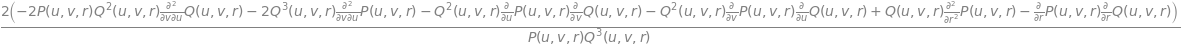

In [57]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [58]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                                                                                    2                 2                 
⎢                                                                                                   ∂                 ∂                  
⎢                                                                                                  ───(Q(u, v, r))   ───(P(u, v, r))     
⎢                                                                                                    2                 2                 
⎢                                                                                                  ∂u                ∂u                  
⎢                                                                                                - ─────────────── - ───────────────     
⎢                                                                                                     Q(u, v, r)        P(u, v, r)       
⎢                                 

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

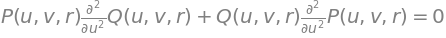

In [61]:
equation3 = Eq((-1)*together(simplify(einst.tensor())[0,0]).args[2],0)
equation3

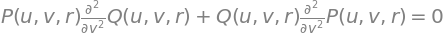

In [62]:
equation4 = Eq((-1)*together(Ric.tensor()[1,1]).args[2],0)
equation4

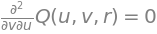

In [63]:
equation5 = Eq(simplify(einst.tensor())[3,3].args[3],0)
equation5 

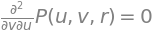

In [64]:
equation6 = Eq(simplify(einst.tensor())[2,2].args[3],0)
equation6

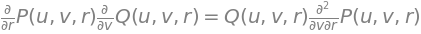

In [84]:
equation7 = Eq( simplify(einst.tensor())[2,1].args[2].args[0],(-1)*simplify(einst.tensor())[2,1].args[2].args[1] )
equation7 

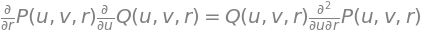

In [76]:
equation8 = Eq(simplify(einst.tensor())[2,0].args[2].args[0],(-1)*simplify(einst.tensor())[2,0].args[2].args[1] ) 
equation8

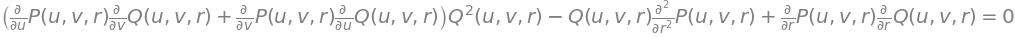

In [92]:
equation9 = Eq(collect(simplify(einst.tensor())[1,0].args[3].subs(equation6.args[0],equation6.args[1]).subs(equation5.args[0],equation6.args[1]),Q**2),0)
equation9

In [94]:
vacuumFieldEquations = Matrix([equation3,equation4,equation5,equation6,equation7,equation8,equation9])
vacuumFieldEquations

⎡                                                     2                            2                                                     
⎢                                                    ∂                            ∂                                                      
⎢                                        P(u, v, r)⋅───(Q(u, v, r)) + Q(u, v, r)⋅───(P(u, v, r)) = 0                                     
⎢                                                     2                            2                                                     
⎢                                                   ∂u                           ∂u                                                      
⎢                                                                                                                                        
⎢                                                     2                            2                                                     
⎢                                 